# Financial data ananysis with Pandas and Yfinance

## comparing stocks

In [2]:
# Import lirbaries
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
yf.pdr_override() 

import seaborn as sns
sns.set()
#plt.style.use('ggplot')

### Import stocks

Recently I've been investing in US stocks market, I was investing in penny stocks which made me lose lot of money...
So I've decided to invest in stock index. Let's find out which way is better to invest in S&P 500 or US total stock market.

In [46]:
# Load data 
spy = pdr.get_data_yahoo('SPY VTI', start = '2001-06-01') # S&P 500
vti = pdr.get_data_yahoo('VTI', start = '2001-06-01') # US total stock market

[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  1 of 1 completed


In [63]:
spy.head(5)

df = pd.DataFrame(spy)
df['Close']['SPY']


Date
2001-05-31    125.949997
2001-06-01    126.730003
2001-06-04    127.339996
2001-06-05    128.800003
2001-06-06    127.730003
                 ...    
2021-05-18    411.940002
2021-05-19    410.859985
2021-05-20    415.279999
2021-05-21    414.940002
2021-05-24    419.170013
Name: SPY, Length: 5027, dtype: float64

In [51]:
vti.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2001-06-15,55.424999,56.005001,55.174999,55.665001,38.530975,1067400
2001-06-18,55.814999,55.915001,55.310001,55.310001,38.285255,282600
2001-06-19,56.150002,56.165001,55.235001,55.465000,38.392555,1777600
2001-06-20,55.375000,56.075001,55.375000,56.049999,38.797489,476000
2001-06-21,56.000000,56.724998,55.875000,56.500000,39.108959,240400


In [6]:
# drop Volume
spy_tmp = spy.drop(columns='Volume')
vti_tmp = vti.drop(columns='Volume')

In [12]:
spy.information

AttributeError: 'DataFrame' object has no attribute 'information'

### Plot data

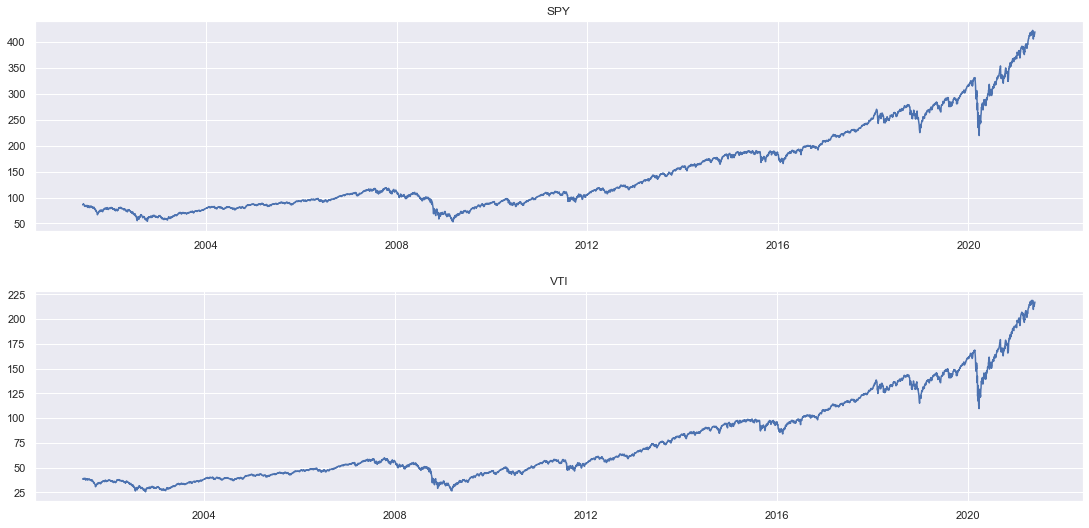

In [7]:
fig = plt.figure(figsize=(16,8))
ax1 = plt.subplot(2,1,1)
ax2 = plt.subplot(2,1,2)
fig.tight_layout(pad=3.0)

ax1.plot(spy.index, spy['Adj Close'])
ax2.plot(vti.index, vti['Adj Close'])


ax1.set_title('SPY')
ax2.set_title('VTI')
plt.show()

They look very same to my eyes, however if you look at the yaxis, pricing is different between SPLG and ITOT. We can't say easily if those have same profit. Let's calculate daily percentage change to see.

### Daily percentage change

In [8]:
def daily_percent_change(ticker):
    dpc = ((ticker['Adj Close'] / ticker['Adj Close'].shift(1) -1) *100)
    dpc.iloc[0] = 0
    return dpc

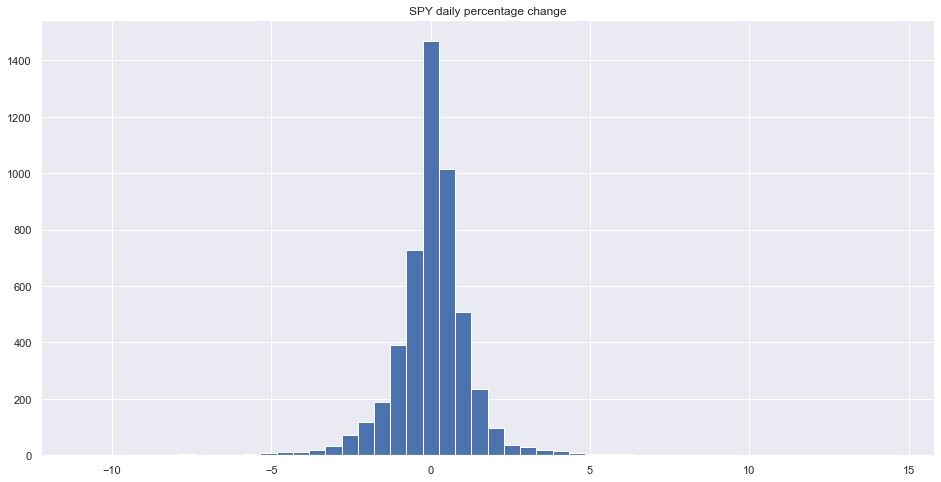

In [9]:
spy_dpc = daily_percent_change(spy)
plt.figure(figsize=(16,8))
plt.hist(spy_dpc, bins=50)
plt.grid(True)
plt.title("SPY daily percentage change")
plt.show()

In [10]:
spy_dpc.describe()

count    5027.000000
mean        0.039084
std         1.226360
min       -10.942361
25%        -0.424899
50%         0.070393
75%         0.582130
max        14.519763
Name: Adj Close, dtype: float64

### Cumulative sum

DPC is daily percentage change, if want to see total changes we need to calculate cumulative sum.

`cumsum()` is a sequence of partial sums of a given data set. It is used to show the summation of data as it grows with time.

In [11]:
# Calculate cumulative sum
spy_dpc_cs = daily_percent_change(spy)
vti_dpc_cs = daily_percent_change(vti)

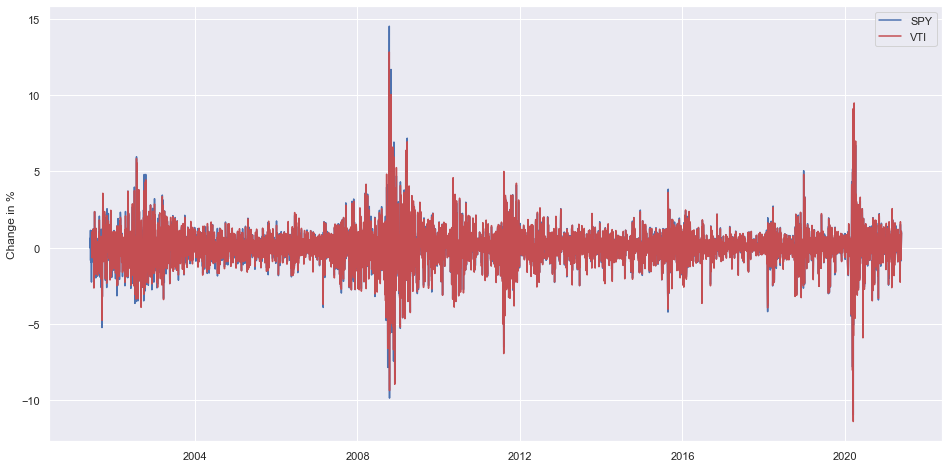

In [12]:
# Plot data

plt.figure(figsize=(16,8))
plt.plot(spy.index, spy_dpc_cs, 'b', label='SPY')
plt.plot(vti.index, vti_dpc_cs, 'r', label='VTI')
plt.ylabel('Change in %')
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [13]:
np.mean(np.abs(spy_dpc_cs - vti_dpc_cs))

0.11210696301173263

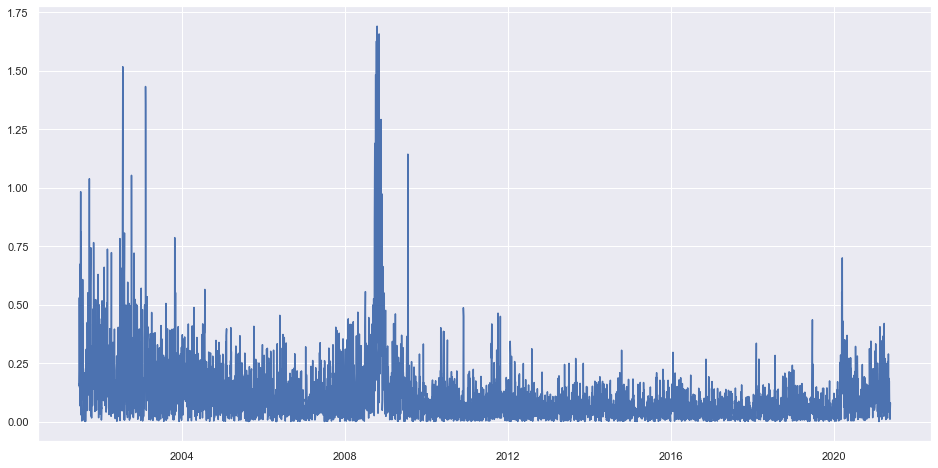

In [14]:
plt.figure(figsize=(16, 8))

plt.plot(np.abs(spy_dpc_cs - vti_dpc_cs))
plt.show()

## Maximum Drawdown

A maximum drawdown (MDD) is the maximum observed loss from a peak to a trough of a portfolio, before a new peak is attained. Maximum drawdown is an indicator of downside risk over a specified time period.

MDD is calculated by (Min Value - Max Value)/Min Value

https://www.investopedia.com/terms/m/maximum-drawdown-mdd.asp

[*********************100%***********************]  1 of 1 completed


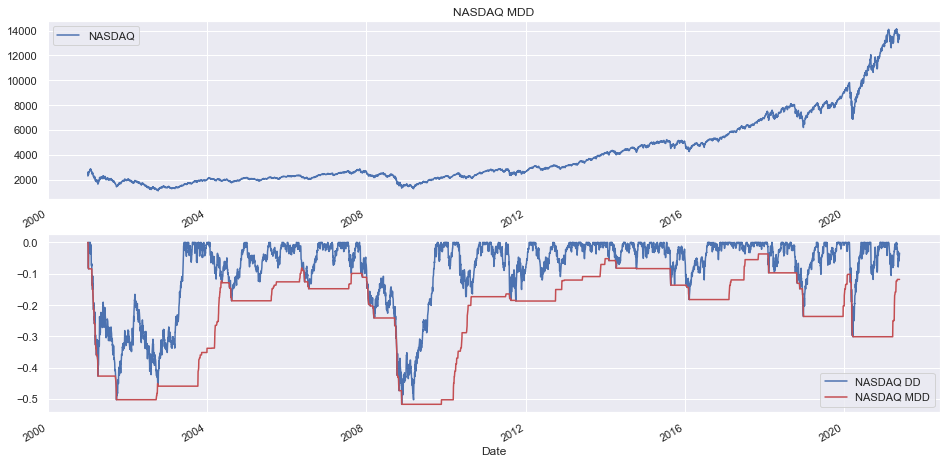

In [15]:
nasdaq = pdr.get_data_yahoo('^IXIC', '2001-01-01') # NASDAQ index from 2001-01-01
window = 252 # Stock market open 252 days per 365 days

peak = nasdaq['Adj Close'].rolling(window, min_periods=1).max()
drawdown = nasdaq['Adj Close']/peak - 1.0 # To calculate how much it changed compared to peak
max_dd = drawdown.rolling(window, min_periods=1).min() # calculate max_dd 1 year cycle

plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
nasdaq['Adj Close'].plot(label='NASDAQ', title='NASDAQ MDD', grid=True, legend=True)
plt.subplot(2,1,2)
drawdown.plot(label='NASDAQ DD', c='b', grid=True, legend=True)
max_dd.plot(label='NASDAQ MDD', c='r', grid=True, legend=True)
plt.show()


Now we see NASDAQ didn't just have smooth ride, let's see what's the highest drawdown and when was it.

In [16]:
print('Highest drawdown value was ', '{:.2%}'.format(max_dd.min()))

Highest drawdown value was  -51.69%


In [17]:
print('During this period ', max_dd[max_dd==max_dd.min()])

During this period  Date
2008-11-20   -0.516916
2008-11-21   -0.516916
2008-11-24   -0.516916
2008-11-25   -0.516916
2008-11-26   -0.516916
                ...   
2009-11-13   -0.516916
2009-11-16   -0.516916
2009-11-17   -0.516916
2009-11-18   -0.516916
2009-11-19   -0.516916
Name: Adj Close, Length: 252, dtype: float64


## Regression Analysis and Correlation Analysis

We've looked into NASDAQ, S&P500. Let's perform correlation analysis on NASDAQ and DOW Jones Index.

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


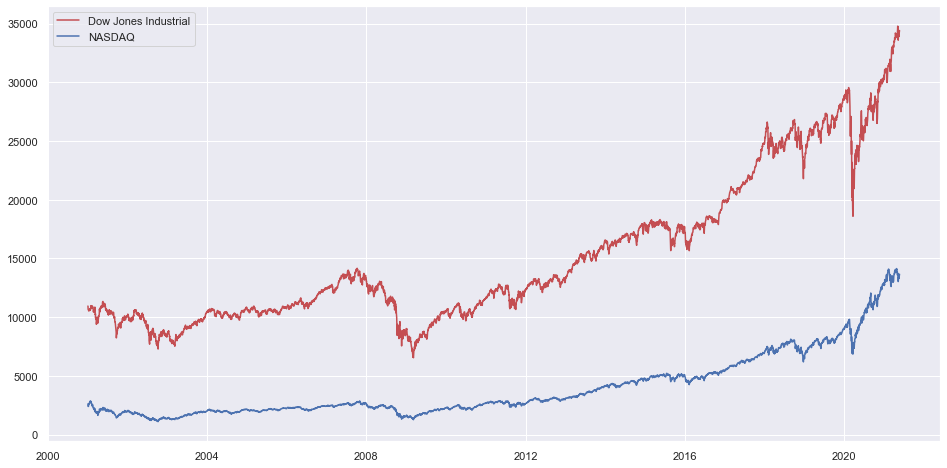

In [18]:
from pandas_datareader import data as pdr
import yfinance as yf
import matplotlib.pyplot as plt
yf.pdr_override()

dow = pdr.get_data_yahoo('^DJI', '2001-01-04')
nasdaq = pdr.get_data_yahoo('^IXIC', '2001-01-04')

plt.figure(figsize=(16,8))
plt.plot(dow.index, dow.Close, 'r', label='Dow Jones Industrial')
plt.plot(nasdaq.index, nasdaq.Close, 'b', label='NASDAQ')
plt.grid(True)
plt.legend(loc='best')
plt.show()

Those two lines have different value index, hard to compare. So we have to normalize to compare values easily.

### Normalization

Above graph is hard to analyze those two lines, we need to normalize and plot graph to see again.

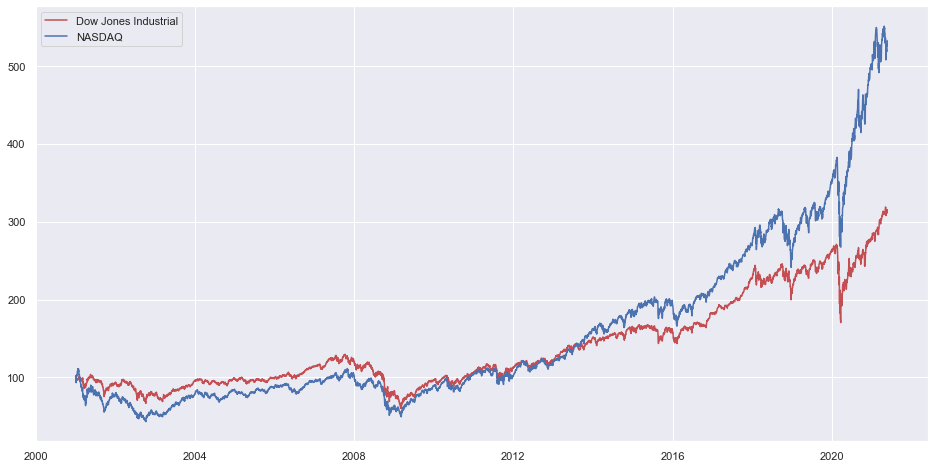

In [19]:
d = (dow.Close / dow.Close.loc['2001-01-04'])*100 # indexation
n = (nasdaq.Close / nasdaq.Close.loc['2001-01-04'])*100 # indexation

plt.figure(figsize=(16,8))
plt.plot(d.index, d, 'r', label='Dow Jones Industrial')
plt.plot(n.index, n, 'b', label='NASDAQ')
plt.grid(True)
plt.legend(loc='best')
plt.show()

### Scatter analysis

Scatter plot is to be used to compare relationship between independent variable x and dependent y. X-axis is independent variable x, Y-axis is dependent variable y. To compare relationship between NASDAQ and DOW index, set X-axis as NASDAQ.

In [20]:
# Make dataframe with NASDAQ and DOW
df = pd.DataFrame({'NASDAQ': nasdaq['Adj Close'], 'DOW': dow['Adj Close']})

# We might have NaN value, if we do fill with `bfill` or `ffill`
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')
df

,NASDAQ,DOW
Date,,
2001-01-03,2616.689941,10945.750000
2001-01-04,2566.830078,10912.410156
2001-01-05,2407.649902,10662.009766
2001-01-08,2395.919922,10621.349609
2001-01-09,2441.300049,10572.549805
...,...,...
2021-05-18,13303.639648,34060.660156
2021-05-19,13299.740234,33896.039062
2021-05-20,13535.740234,34084.148438


Make scatter plot

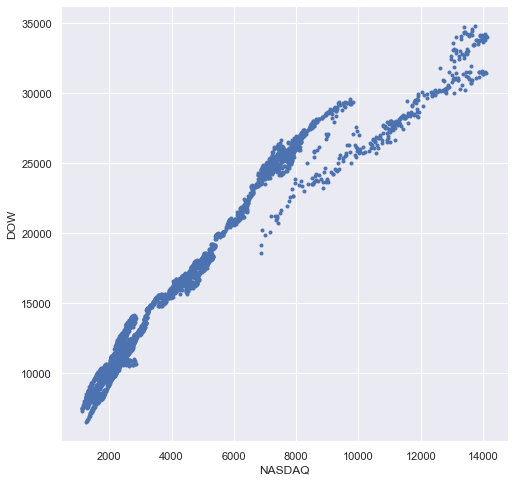

In [21]:
plt.figure(figsize=(8,8))
plt.scatter(df['NASDAQ'], df['DOW'], marker='.')
plt.xlabel('NASDAQ')
plt.ylabel('DOW')
plt.show()

From this scatter plot, we see it's very close to `y=x` linear graph. Therefore we might say NASDAQ and DOW has relationship. However it's not to tell they do have relationship, we'll use linear regression model to determine.

## Linear Regression

In [22]:
from scipy import stats

regr = stats.linregress(df['NASDAQ'], df['DOW'])
regr

LinregressResult(slope=2.238942570467739, intercept=6284.279510463464, rvalue=0.9757091443222967, pvalue=0.0, stderr=0.007020593567544586, intercept_stderr=33.921528111746355)

In [23]:
df.corr()

,NASDAQ,DOW
NASDAQ,1.000000,0.975709
DOW,0.975709,1.000000


In [24]:
df['DOW'].corr(df['NASDAQ']) # same as df.DOW.corr(df.NASDAQ)

0.9757091443222968

### R-Squared


In [25]:
r_value = df['NASDAQ'].corr(df['DOW'])
r_value

0.9757091443222968

In [26]:
r_squared = r_value ** 2
r_squared

0.9520083343141487

SInce it's very close to 1, most variables are close to regression line

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


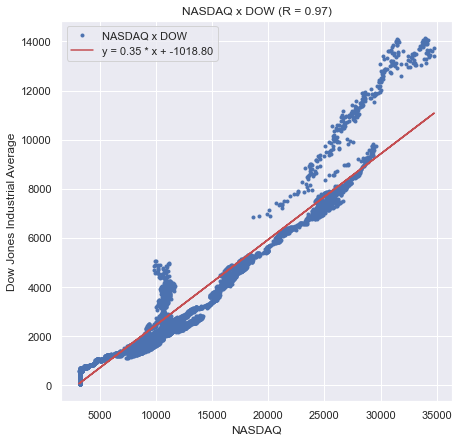

In [27]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
from scipy import stats
import matplotlib.pyplot as plt

#import seaborn as sns
sns.set()
#plt.style.use('ggplot')

nasdaq = pdr.get_data_yahoo('^IXIC')
dow = pdr.get_data_yahoo('^DJI')

df = pd.DataFrame({'x' : dow['Adj Close'], 'y': nasdaq['Adj Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

regr = stats.linregress(df.x, df.y)
regr_line = f'y = {regr.slope:.2f} * x + {regr.intercept:.2f}'

plt.figure(figsize=(7,7))
plt.plot(df.x, df.y, '.')
plt.plot(df.x, regr.slope * df.x + regr.intercept, 'r')
plt.legend(['NASDAQ x DOW', regr_line])
plt.title(f'NASDAQ x DOW (R = {regr.rvalue:.2f})')
plt.xlabel('NASDAQ')
plt.ylabel('Dow Jones Industrial Average')
plt.show()

In [30]:
# Helper function for plotting
def plot_reg(x_tick, y_tick):
    x = pdr.get_data_yahoo(x_tick, start='2018-01-01')
    y = pdr.get_data_yahoo(y_tick, start='2018-01-01')
    df = pd.DataFrame({'x' : x['Close'], 'y': y['Close']})
    df = df.fillna(method='bfill')
    df = df.fillna(method='ffill')
    
    regr = stats.linregress(df.x, df.y)
    regr_line = f'y = {regr.slope:.2f} * x + {regr.intercept:.2f}'

    plt.figure(figsize=(7,7))
    plt.plot(df.x, df.y, '.')
    plt.plot(df.x, regr.slope * df.x + regr.intercept, 'r')
    plt.legend([f'{x_tick} x {y_tick}', regr_line])
    plt.title(f'{x_tick} x {y_tick} (R = {regr.rvalue:.2f})')
    plt.xlabel(x_tick)
    plt.ylabel(y_tick)
    sns.pairplot(df)
    plt.show()
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


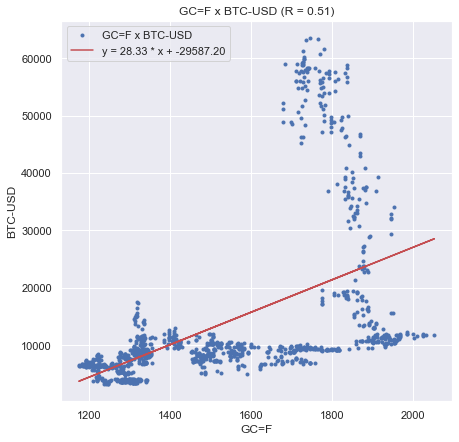

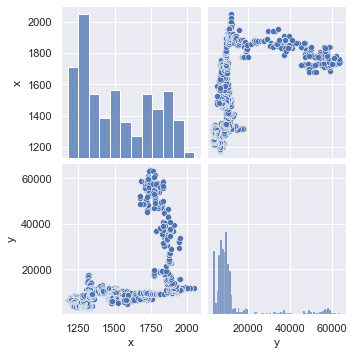

In [38]:
plot_reg('GC=F', 'BTC-USD')

### Risk management by R value

Modern portfolio theory (MPT), or mean-variance analysis, by Harry Markowiz, is a mathematical framework for assembling a portfolio of assets such that the expected return is maximized for a given level of risk.

It is a formalization and extension of diversification in investing, the idea that owning different kinds of financial assets is less risky than owning only one type. Its key insight is that an asset's risk and return should not be assessed by itself, but by how it contributes to a portfolio's overall risk and return.

Therefore we can conclude with above analysis, to distribute our portfolio with lower correlation like gold (GC=F) and bitcoin (BTC-USD) which has r value of 0.42 to minimize risk.